In [1]:
# cargar paquetes 

# -*- coding: 850 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import xlsxwriter
import xlsxwriter as xlwr
import matplotlib.image as mpimg
from time import time


from xlsxwriter.workbook import Workbook
from xlsxwriter import Workbook   
from datetime import datetime, date, time, timedelta
import os
import os.path, time
from os import listdir
from glob import glob



# Carpeta de trabajo 
os.getcwd()

'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023'

In [2]:
# Fecha de descarga 
fechadescarga=time.ctime(os.path.getmtime(os.getcwd()+'\\dataquimica\\inscripcion.csv'))

print('La fecha de descarga de los datas es ',fechadescarga)

# la funcion glob guarda los nombres de los archivos para luego poderlos leer

intentos = glob(os.getcwd()+'\\dataquimica\\*.csv')
intentos

La fecha de descarga de los datas es  Tue May 30 11:29:12 2023


['C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\decimo.csv',
 'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\encuesta.csv',
 'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\inscripcion.csv',
 'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\once.csv',
 'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\simulacro.csv']

In [3]:
# Contenido Carpeta de trabajo
mydir = os.getcwd() # would be the same path as a.py
contenido = os.listdir(mydir)
print(contenido, mydir)

['.ipynb_checkpoints', 'chromedriver_win32', 'dataquimica', 'HistorialVersiones', 'icfes.csv', 'Olimpiadas 2023 - Quimica.ipynb', 'output.csv', 'outputquimica.csv', 'ResultadosColegiosQuimica2023', 'Scrapy cierre intentos - Quimica.ipynb', 'Scrapy descarga Notas - Quimica.ipynb', 'textoQuimica'] C:\Users\harvey.vargas\Documents\Math Decision\Olimpiadas_UdeA\Olimpiadas Quimica 2023\Quimica Fase 1 - 2023


In [4]:
# Fecha de descarga 
fechadescarga=time.ctime(os.path.getmtime(os.getcwd()+'\\dataquimica\\decimo.csv'))
fechadescarga

'Mon Jun  5 08:41:01 2023'

In [5]:
from glob import glob
import ntpath


# la funcion glob guarda los nombres de los archivos para luego poderlos leer

intentos = glob(os.getcwd()+'\\dataquimica\\*.csv')
intentos

['C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\decimo.csv',
 'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\encuesta.csv',
 'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\inscripcion.csv',
 'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\once.csv',
 'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\simulacro.csv']

## Lectura de Datos 
### Intentos 

In [6]:
# Diccionario para colocar grado a los estudiantes  
grados = {'simulacro.csv': 0, 
          'decimo.csv': 10, 
          'once.csv': 11}


# Escribimos un loop que irá a través de cada uno de los nombres 
# de archivo a través de globbing y el resultado final será la lista 
# dataframes que contiene una columna adicional donde indica el grado del cuestionario que realizo 

list_data = []

Fase1_data = [os.getcwd()+'\\dataquimica\\encuesta.csv', 
             os.getcwd()+'\\dataquimica\\simulacro.csv', 
             os.getcwd()+'\\dataquimica\\inscripcion.csv', 
             os.getcwd()+'\\icfes.csv']

for filename in intentos:
    if filename not in Fase1_data:
        data = pd.read_csv(filename)
        grado = ntpath.basename(filename)
        data=data.assign(cuestionario=grados[grado])
        list_data.append(data)
    
fase1 = pd.concat(list_data, ignore_index=True)
fase1 = fase1.drop(fase1[fase1['Apellido(s)']=='Promedio general'].index)

# Se borran los intentos d prueba que se realizaron

fase1=fase1[~fase1.Nombre.str.contains("PRUEBA")]

In [7]:
Fase1_data[2]

'C:\\Users\\harvey.vargas\\Documents\\Math Decision\\Olimpiadas_UdeA\\Olimpiadas Quimica 2023\\Quimica Fase 1 - 2023\\dataquimica\\inscripcion.csv'

### Inscritos

In [8]:
inscripcion = pd.read_csv(Fase1_data[2], low_memory=True)

inscripcion=inscripcion.loc[:, ['Nombre de usuario', 'Grupo de curso', 'Colegio', 'Dirección de correo']]
inscripcion.rename(columns={'Nombre de usuario':'documento',
                        'Grupo de curso':'grado'},
               inplace=True)

In [9]:
inscripcion

documento  grado Colegio      Dirección de correo
0     1029985596     11   44560  1029985596@gmail.com.es
1     1113862233     10   46458    1113862233@gmailcomes
2     1097185529     11  183509  1097185529@gmail.com.es
3     1017929897     11    1313    1017929897@gmailcomes
4     1019605131     11   46771  1019605131@gmail.com.es
...          ...    ...     ...                      ...
7167  1031940609     11     174  1031940609@gmail.com.es
7168  1034989133     10   41996    1034989133@gmailcomes
7169  1034991299     10   41996    1034991299@gmailcomes
7170  1011512844     10     174  1011512844@gmail.com.es
7171  1014662505     10   51888  1014662505@gmail.com.es

[7172 rows x 4 columns]

In [10]:
fase1

Apellido(s)           Nombre    Dirección de correo      Estado  \
0        SAAVEDRA ARIAS     SIMON FELIPE  1097499986@gmailcomes  Finalizado   
1           QUIONEZ REY       JUAN DAVID  1095307646@gmailcomes  Finalizado   
2        SAAVEDRA ARIAS     SIMON FELIPE  1097499986@gmailcomes  Finalizado   
3        SAAVEDRA ARIAS     SIMON FELIPE  1097499986@gmailcomes  Finalizado   
4      LANDAZBAL RANGEL       JUAN DAVID  1142714705@gmailcomes  Finalizado   
...                 ...              ...                    ...         ...   
4602    SALOMN MARCHENA          DANIELA  1044214107@gmailcomes    En curso   
4603     ALVAREZ ARTETA          VALERIE  1047041788@gmailcomes    En curso   
4604  GUTIERREZ CHARRIS            LAURA  1048069233@gmailcomes    En curso   
4605       GMEZ HERRERA  SAMUEL JERONIMO  1032939459@gmailcomes    En curso   
4606      GRIJALBA MORA          MARIANA  1043968297@gmailcomes    En curso   

                  Comenzado el               Finalizado  \
0      2 de May de 2023  17:53  2 de May de 2023  18:53   
1      2 de May de 2023  17:56  2 de May de 2023  19:31   
2      2 de May de 2023  18:54  2 de May de 2023  19:40   
3      2 de May de 2023  19:41  2 de May de 2023  20:31   
4      2 de May de 2023  20:19  2 de May de 2023  21:10   
...                        ...                      ...   
4602  5 de June de 2023  08:27                        -   
4603  5 de June de 2023  08:28                        -   
4604  5 de June de 2023  08:32                        -   
4605  5 de June de 2023  08:34                        -   
4606  5 de June de 2023  08:36                        -   

            Tiempo requerido Calificación/25 P. 1 /1 P. 2 /1  ... P. 17 /1  \
0                     1 hora              17       1       1  ...        1   
1          1 hora 35 minutos              14       0       1  ...        0   
2     46 minutos 21 segundos              15       1       1  ...        0   
3     50 minutos 16 segundos              14       0       1  ...        1   
4     50 minutos 55 segundos              19       1       1  ...        1   
...                      ...             ...     ...     ...  ...      ...   
4602                       -               -       -       -  ...        -   
4603                       -               -       -       -  ...        -   
4604                       -               -       -       -  ...        -   
4605                       -               -       -       -  ...        -   
4606                       -               -       -       -  ...        -   

     P. 18 /1 P. 19 /1 P. 20 /1 P. 21 /1 P. 22 /1 P. 23 /1 P. 24 /1 P. 25 /1  \
0           1        1        1        0        1        0        1        1   
1           0        1        0        0        1        1        1        1   
2           0        1        1        1        1        0        1        0   
3           1        0        1        0        0        1        0        1   
4           1        0        1        1        0        1        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4602        -        -        -        -        -        -        -        -   
4603        -        -        -        -        -        -        -        -   
4604        -        -        -        -        -        -        -        -   
4605        -        -        -        -        -        -        -        -   
4606        -        -        -        -        -        -        -        -   

     cuestionario  
0              10  
1              10  
2              10  
3              10  
4              10  
...           ...  
4602           11  
4603           11  
4604           11  
4605           11  
4606           11  

[4606 rows x 34 columns]

Número total de inscritos: 7172
Número total de colegios: 282


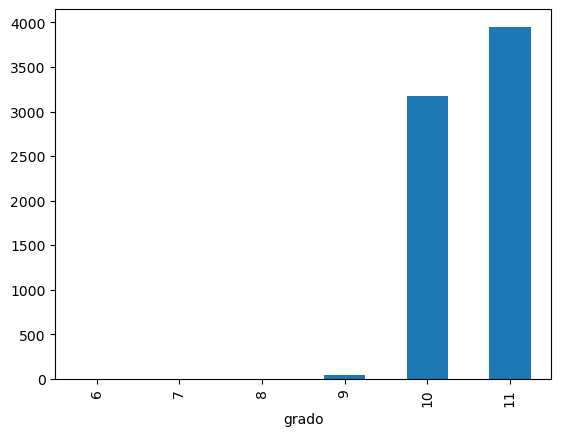

In [11]:
print('Número total de inscritos: {}'.format(inscripcion['documento'].count()))
print('Número total de colegios: {}'.format(inscripcion['Colegio'].nunique()))

inscripcion.groupby('grado')[ 'documento'].nunique().plot(kind='bar')

### Encuesta

En la encuesta se consulta a cada uno de los inscritos por:

Correo real del inscrito
Género: Femenino - Masculino
Edad
Estrato Socio-Económico
Si tiene o no entrenamiento en Olimpiadas
Como se entero del evento
Grado

In [12]:
encuesta = pd.read_csv(Fase1_data[0])
encuesta=inscripcion.merge(encuesta, on='Dirección de correo', how="right")
len(encuesta), len(inscripcion)

names_encuesta = encuesta.columns.tolist()

names_encuesta[names_encuesta.index('Nombre completo del usuario')] = 'Nombre_Completo'
names_encuesta[names_encuesta.index('Correo Electrónico - si no tienes, coloca el de tu acudiente')] = 'Correo'
names_encuesta[names_encuesta.index('Género')] = 'Sexo'
names_encuesta[names_encuesta.index('Edad<span class="boundaries"></span>')] = 'Edad'
names_encuesta[names_encuesta.index('Grado que cursas<span class="boundaries"> (4 - 12)</span>')] = 'GradoEncuesta'
names_encuesta[names_encuesta.index('(No es obligatoria esta respuesta) Estrato socio-económico. <span class="boundaries"> (1 - 6)</span>')] = 'Estrato'
names_encuesta[names_encuesta.index('¿Has tenido entrenamiento para las Olimpiadas?')] = 'Entrenamiento'
names_encuesta[names_encuesta.index('¿Cómo se enteró de las Olimpiadas?')] = 'publicidad'

encuesta.columns = names_encuesta

encuesta.head(3)
len(encuesta)



3872

### Listado de Colegios 

In [13]:
# IcfesColegio  = pd.read_csv(Fase1_data[3])

# IcfesColegio['Colegio']= IcfesColegio['icfes'].astype('int64', errors='ignore')

# IcfesColegio = IcfesColegio.dropna(subset=['correo_profesor'])
# IcfesColegio.drop(['icfes'], axis=1)

### Borrar y renombrar columnas

In [14]:
names=fase1.columns.tolist()
names[names.index('Apellido(s)')] = 'Apellido'
names[names.index('Calificación/25')] = 'PuntajeIntento'
names[names.index('Comenzado el')] = 'Inicio'

for i in range(1, 26, 1):
        names[names.index('P. '+str(i)+' /1')] = 'P'+str(i)

fase1.columns = names

# Pasa los datos a numericos para poder trabajar con ellos  

cuest = ['PuntajeIntento', 'P1',  'P2',  'P3',  'P4',  'P5',  'P6',  'P7',  'P8',  'P9',  'P10',  'P11',  'P12',  'P13',  'P14',  'P15',
 'P16',  'P17',  'P18',  'P19',  'P20', 'P21', 'P22', 'P23', 'P24', 'P25']

for col in cuest:
    fase1[col]=pd.to_numeric(fase1[col], errors='coerce')


## Formato de Fecha 

In [15]:
# dar formato a la hora de presentado el examen 

fase1['Inicio']=fase1['Inicio'].apply(lambda x: datetime.strptime(x, '%d de %B de %Y %H:%M')\
                                .strftime('%d/%b/%Y, %H:%M') )

fase1['Finalizado']=fase1['Finalizado'].apply(lambda x: 0 if x == '-' else \
                                        datetime.strptime(x, '%d de %B de %Y %H:%M').strftime('%d/%b/%Y, %H:%M') )  




In [16]:
# Se va a reemplazar los que no tengan fecha de finalizado por la fecha y hora de descarga del archivo calificaciones 
# Esto con el fin de tener registro de tiempo hasta ahora 
fase1['Finalizado'].replace(0, datetime.strptime(fechadescarga, '%a %b %d %H:%M:%S %Y').strftime('%d/%b/%Y, %H:%M'), inplace=True)

# Se convierten las fechas a formato para trabajar con ellas 
fase1['Inicio'] = pd.to_datetime(fase1.Inicio)
fase1['Finalizado'] = pd.to_datetime(fase1.Finalizado)

# Se ordena el archivo por fecha de inicio de intentos 
fase1=fase1.sort_values(by="Inicio")

#Se resetea el tiempo requerido con las fechas de inicio y finalización 

fase1['Tiempo requerido']= (fase1['Finalizado']-fase1['Inicio'])
fase1['Tiempo requerido']=pd.to_timedelta(fase1['Tiempo requerido'], unit='H') / np.timedelta64(1, 'h')



In [17]:
from datetime import timedelta

fase1['Finalizado_dia']       = fase1['Finalizado'].apply(lambda x: x.strftime('%Y-%m-%d'))
fase1['Inicio_dia']           = fase1['Inicio'].apply(lambda x: x.strftime('%Y-%m-%d'))
fase1['Tiempo requerido sep'] = fase1['Tiempo requerido'].round(1)

## Se defininen Intentos 

In [18]:
df10 = fase1[fase1.cuestionario.isin([10,9,8,7,6])]
df11 = fase1[fase1.cuestionario.isin([11])]
print(len(df10), len(df11))

2078 2528


In [19]:
cols = ['P1',  'P2',  'P3',  'P4',  'P5',  'P6',  'P7',  'P8',  'P9',  'P10',  'P11',  'P12',  'P13',  'P14',  'P15',
 'P16',  'P17',  'P18',  'P19',  'P20', 'P21',  'P22',  'P23',  'P24',  'P25']

df11.loc[:, cols] = df11.loc[:, cols].fillna(0, inplace=False)
df10.loc[:, cols] = df10.loc[:, cols].fillna(0, inplace=False)


C:\Users\harvey.vargas\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [20]:
list_EXP   = ['P1',  'P2',  'P3',  'P4',  'P5',  'P6']
df10['EXP'] = df10.loc[:,list_EXP].sum(axis=1) 

list_PROP = [ 'P7',  'P8',  'P9',  'P10',  'P11',  'P12']
df10['PROP'] = df10.loc[:,list_PROP].sum(axis=1)

list_TAB  = ['P13',  'P14',  'P15', 'P16',  'P17',  'P18']
df10['TAB'] = df10.loc[:,list_TAB].sum(axis=1)

list_ESTE = [ 'P19',  'P20', 'P21',  'P22',  'P23',  'P24',  'P25']
df10['ESTE'] = df10.loc[:,list_ESTE].sum(axis=1)


list_EXP   = ['P1',  'P2',  'P3',  'P4',  'P5']
df11['EXP'] = df11.loc[:,list_EXP].sum(axis=1) 

list_PROP = [ 'P6' , 'P7',  'P8',  'P9',  'P10']
df11['PROP'] = df11.loc[:,list_PROP].sum(axis=1)

list_TAB  = [ 'P11',  'P12', 'P13',  'P14',  'P15']
df11['TAB'] = df11.loc[:,list_TAB].sum(axis=1)

list_ESTE = ['P16',  'P17',  'P18', 'P19',  'P20']
df11['ESTE'] = df11.loc[:,list_ESTE].sum(axis=1)

list_QORG =['P21',  'P22',  'P23',  'P24',  'P25']
df11['QORG'] = df11.loc[:,list_QORG].sum(axis=1)


df = pd.concat([df10, df11], ignore_index=True)

df = df.drop(['P1',  'P2',  'P3',  'P4',  'P5',  'P6',  'P7',  'P8',  'P9',  'P10',  'P11',  'P12',  'P13',  'P14',  'P15',
 'P16',  'P17',  'P18',  'P19',  'P20', 'P21',  'P22',  'P23',  'P24',  'P25'], axis=1)

C:\Users\harvey.vargas\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harvey.vargas\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\harvey.vargas\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [21]:
len(df)

4606

In [22]:
fase1=df

In [23]:
fase1.head()

Apellido        Nombre    Dirección de correo      Estado  \
0    SAAVEDRA ARIAS  SIMON FELIPE  1097499986@gmailcomes  Finalizado   
1       QUIONEZ REY    JUAN DAVID  1095307646@gmailcomes  Finalizado   
2    SAAVEDRA ARIAS  SIMON FELIPE  1097499986@gmailcomes  Finalizado   
3    SAAVEDRA ARIAS  SIMON FELIPE  1097499986@gmailcomes  Finalizado   
4  LANDAZBAL RANGEL    JUAN DAVID  1142714705@gmailcomes  Finalizado   

               Inicio          Finalizado  Tiempo requerido  PuntajeIntento  \
0 2023-05-02 17:53:00 2023-05-02 18:53:00          1.000000            17.0   
1 2023-05-02 17:56:00 2023-05-02 19:31:00          1.583333            14.0   
2 2023-05-02 18:54:00 2023-05-02 19:40:00          0.766667            15.0   
3 2023-05-02 19:41:00 2023-05-02 20:31:00          0.833333            14.0   
4 2023-05-02 20:19:00 2023-05-02 21:10:00          0.850000            19.0   

   cuestionario Finalizado_dia  Inicio_dia  Tiempo requerido sep  EXP  PROP  \
0            10     2023-05-02  2023-05-02                   1.0  5.0   4.0   
1            10     2023-05-02  2023-05-02                   1.6  4.0   2.0   
2            10     2023-05-02  2023-05-02                   0.8  4.0   3.0   
3            10     2023-05-02  2023-05-02                   0.8  4.0   2.0   
4            10     2023-05-02  2023-05-02                   0.8  6.0   5.0   

   TAB  ESTE  QORG  
0  3.0   5.0   NaN  
1  3.0   5.0   NaN  
2  3.0   5.0   NaN  
3  5.0   3.0   NaN  
4  5.0   3.0   NaN

In [24]:
fase1=inscripcion.merge(fase1, on='Dirección de correo', how="right")
len(fase1)

4606

In [25]:
fase1

documento  grado Colegio    Dirección de correo           Apellido  \
0     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
1     1095307646   10.0   29462  1095307646@gmailcomes        QUIONEZ REY   
2     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
3     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
4     1142714705   10.0   29462  1142714705@gmailcomes   LANDAZBAL RANGEL   
...          ...    ...     ...                    ...                ...   
4601  1044214107   11.0    3046  1044214107@gmailcomes    SALOMN MARCHENA   
4602  1047041788   11.0    3046  1047041788@gmailcomes     ALVAREZ ARTETA   
4603  1048069233   11.0    3046  1048069233@gmailcomes  GUTIERREZ CHARRIS   
4604  1032939459   11.0    3046  1032939459@gmailcomes       GMEZ HERRERA   
4605  1043968297   11.0    3046  1043968297@gmailcomes      GRIJALBA MORA   

               Nombre      Estado              Inicio          Finalizado  \
0        SIMON FELIPE  Finalizado 2023-05-02 17:53:00 2023-05-02 18:53:00   
1          JUAN DAVID  Finalizado 2023-05-02 17:56:00 2023-05-02 19:31:00   
2        SIMON FELIPE  Finalizado 2023-05-02 18:54:00 2023-05-02 19:40:00   
3        SIMON FELIPE  Finalizado 2023-05-02 19:41:00 2023-05-02 20:31:00   
4          JUAN DAVID  Finalizado 2023-05-02 20:19:00 2023-05-02 21:10:00   
...               ...         ...                 ...                 ...   
4601          DANIELA    En curso 2023-06-05 08:27:00 2023-06-05 08:41:00   
4602          VALERIE    En curso 2023-06-05 08:28:00 2023-06-05 08:41:00   
4603            LAURA    En curso 2023-06-05 08:32:00 2023-06-05 08:41:00   
4604  SAMUEL JERONIMO    En curso 2023-06-05 08:34:00 2023-06-05 08:41:00   
4605          MARIANA    En curso 2023-06-05 08:36:00 2023-06-05 08:41:00   

      Tiempo requerido  PuntajeIntento  cuestionario Finalizado_dia  \
0             1.000000            17.0            10     2023-05-02   
1             1.583333            14.0            10     2023-05-02   
2             0.766667            15.0            10     2023-05-02   
3             0.833333            14.0            10     2023-05-02   
4             0.850000            19.0            10     2023-05-02   
...                ...             ...           ...            ...   
4601          0.233333             NaN            11     2023-06-05   
4602          0.216667             NaN            11     2023-06-05   
4603          0.150000             NaN            11     2023-06-05   
4604          0.116667             NaN            11     2023-06-05   
4605          0.083333             NaN            11     2023-06-05   

      Inicio_dia  Tiempo requerido sep  EXP  PROP  TAB  ESTE  QORG  
0     2023-05-02                   1.0  5.0   4.0  3.0   5.0   NaN  
1     2023-05-02                   1.6  4.0   2.0  3.0   5.0   NaN  
2     2023-05-02                   0.8  4.0   3.0  3.0   5.0   NaN  
3     2023-05-02                   0.8  4.0   2.0  5.0   3.0   NaN  
4     2023-05-02                   0.8  6.0   5.0  5.0   3.0   NaN  
...          ...                   ...  ...   ...  ...   ...   ...  
4601  2023-06-05                   0.2  0.0   0.0  0.0   0.0   0.0  
4602  2023-06-05                   0.2  0.0   0.0  0.0   0.0   0.0  
4603  2023-06-05                   0.2  0.0   0.0  0.0   0.0   0.0  
4604  2023-06-05                   0.1  0.0   0.0  0.0   0.0   0.0  
4605  2023-06-05                   0.1  0.0   0.0  0.0   0.0   0.0  

[4606 rows x 20 columns]

In [26]:
# Cuenta el número de intentos de cada estudiante 

fase1["Intento"] = fase1.groupby('documento').cumcount()+1

# Se define cuantos intentos realizo cada estudiante

maxI   = fase1.groupby(['documento'])['Intento'].max().reset_index(name='maxI')
fase1  = pd.merge(fase1, maxI, on='documento')

# Puntaje maximo por intentos 

puntajemaximo = fase1.groupby(['documento'])['PuntajeIntento'].max().reset_index(name='puntajemaximo')
fase1         = pd.merge(fase1, puntajemaximo, on='documento')

In [27]:
fase1['documento'] = fase1['documento'].astype('int64', errors='ignore')

In [28]:
fase1

documento  grado Colegio    Dirección de correo           Apellido  \
0     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
1     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
2     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
3     1095307646   10.0   29462  1095307646@gmailcomes        QUIONEZ REY   
4     1095307646   10.0   29462  1095307646@gmailcomes        QUIONEZ REY   
...          ...    ...     ...                    ...                ...   
4553  1044214107   11.0    3046  1044214107@gmailcomes    SALOMN MARCHENA   
4554  1047041788   11.0    3046  1047041788@gmailcomes     ALVAREZ ARTETA   
4555  1048069233   11.0    3046  1048069233@gmailcomes  GUTIERREZ CHARRIS   
4556  1032939459   11.0    3046  1032939459@gmailcomes       GMEZ HERRERA   
4557  1043968297   11.0    3046  1043968297@gmailcomes      GRIJALBA MORA   

               Nombre      Estado              Inicio          Finalizado  \
0        SIMON FELIPE  Finalizado 2023-05-02 17:53:00 2023-05-02 18:53:00   
1        SIMON FELIPE  Finalizado 2023-05-02 18:54:00 2023-05-02 19:40:00   
2        SIMON FELIPE  Finalizado 2023-05-02 19:41:00 2023-05-02 20:31:00   
3          JUAN DAVID  Finalizado 2023-05-02 17:56:00 2023-05-02 19:31:00   
4          JUAN DAVID  Finalizado 2023-05-04 17:46:00 2023-05-04 19:46:00   
...               ...         ...                 ...                 ...   
4553          DANIELA    En curso 2023-06-05 08:27:00 2023-06-05 08:41:00   
4554          VALERIE    En curso 2023-06-05 08:28:00 2023-06-05 08:41:00   
4555            LAURA    En curso 2023-06-05 08:32:00 2023-06-05 08:41:00   
4556  SAMUEL JERONIMO    En curso 2023-06-05 08:34:00 2023-06-05 08:41:00   
4557          MARIANA    En curso 2023-06-05 08:36:00 2023-06-05 08:41:00   

      Tiempo requerido  ...  Inicio_dia  Tiempo requerido sep  EXP PROP  TAB  \
0             1.000000  ...  2023-05-02                   1.0  5.0  4.0  3.0   
1             0.766667  ...  2023-05-02                   0.8  4.0  3.0  3.0   
2             0.833333  ...  2023-05-02                   0.8  4.0  2.0  5.0   
3             1.583333  ...  2023-05-02                   1.6  4.0  2.0  3.0   
4             2.000000  ...  2023-05-04                   2.0  2.0  4.0  6.0   
...                ...  ...         ...                   ...  ...  ...  ...   
4553          0.233333  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4554          0.216667  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4555          0.150000  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4556          0.116667  ...  2023-06-05                   0.1  0.0  0.0  0.0   
4557          0.083333  ...  2023-06-05                   0.1  0.0  0.0  0.0   

      ESTE  QORG  Intento  maxI  puntajemaximo  
0      5.0   NaN        1     3           17.0  
1      5.0   NaN        2     3           17.0  
2      3.0   NaN        3     3           17.0  
3      5.0   NaN        1     3           21.0  
4      4.0   NaN        2     3           21.0  
...    ...   ...      ...   ...            ...  
4553   0.0   0.0        1     1            NaN  
4554   0.0   0.0        1     1            NaN  
4555   0.0   0.0        1     1            NaN  
4556   0.0   0.0        1     1            NaN  
4557   0.0   0.0        1     1            NaN  

[4558 rows x 23 columns]

## Errores de conexión 

In [29]:
## conexiones que aun no se cierran 

print('Hay {} estudiantes que aun no cierran intentos:'.format(fase1.documento[(fase1['Tiempo requerido']>2) & (fase1['Estado']=='En curso')].count())) 

# fase1[(fase1['Tiempo requerido']>2) & (fase1['Estado']=='En curso') ][[ 'cuestionario', 'documento']].groupby('cuestionario').count().plot(kind='bar')

Hay 41 estudiantes que aun no cierran intentos:


### Descarga de intentos no finalizados 
Esto se realiza para posteriormente, cerrar los intentos que aun se encuentran en curso. 

In [30]:
# Intentos no finalizados 
# Tiempo requerido mayor o igual a 2 
# Estado *en curso*


para_finalizar = fase1[(fase1['Tiempo requerido']>=2) & (fase1['Estado']=='En curso')]\
                    [['documento','Nombre', 'Apellido', 'cuestionario', 'Tiempo requerido']]

# Archivo para cerrar los intentos no finalizados 

para_finalizar.to_csv("output.csv", index=False)

Hay 282 estudiantes finalizaron intento con error de conexión
Estudiantes realizando el intento 7


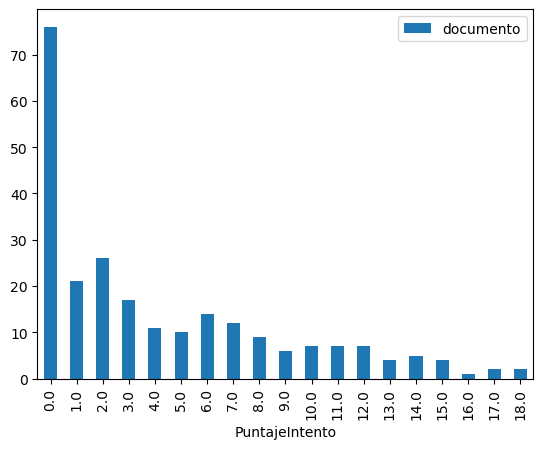

In [31]:
## conexiones que aun no se cierran 

error_conexion  = fase1.documento[fase1['Tiempo requerido']>2].count()

print('Hay {} estudiantes finalizaron intento con error de conexión'.format(error_conexion))

# Estudiantes que deben estar realizando la prueba al momento de la descarga  

print('Estudiantes realizando el intento {}'.format(fase1\
                                                    ['Nombre'][(fase1['Tiempo requerido']<2) & (fase1['Estado']=='En curso') ].count()))

fase1[(fase1['Tiempo requerido']>2)][['PuntajeIntento', 'documento']].groupby('PuntajeIntento').count().plot(kind='bar')


cuestionario
10    2019
11    2491
Name: PuntajeIntento, dtype: int64


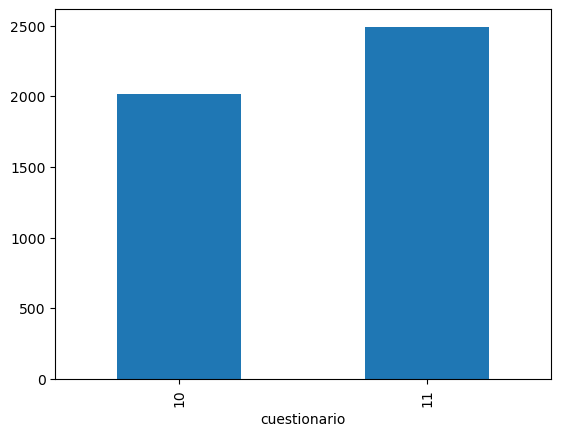

In [32]:
print(fase1.groupby('cuestionario')['PuntajeIntento'].count())
fase1.groupby('cuestionario')['PuntajeIntento'].count().plot(kind='bar')
plt.show()

In [33]:
inscripcion

documento  grado Colegio      Dirección de correo
0     1029985596     11   44560  1029985596@gmail.com.es
1     1113862233     10   46458    1113862233@gmailcomes
2     1097185529     11  183509  1097185529@gmail.com.es
3     1017929897     11    1313    1017929897@gmailcomes
4     1019605131     11   46771  1019605131@gmail.com.es
...          ...    ...     ...                      ...
7167  1031940609     11     174  1031940609@gmail.com.es
7168  1034989133     10   41996    1034989133@gmailcomes
7169  1034991299     10   41996    1034991299@gmailcomes
7170  1011512844     10     174  1011512844@gmail.com.es
7171  1014662505     10   51888  1014662505@gmail.com.es

[7172 rows x 4 columns]

In [34]:
fase1.head()

documento  grado Colegio    Dirección de correo        Apellido  \
0  1097499986   10.0   29462  1097499986@gmailcomes  SAAVEDRA ARIAS   
1  1097499986   10.0   29462  1097499986@gmailcomes  SAAVEDRA ARIAS   
2  1097499986   10.0   29462  1097499986@gmailcomes  SAAVEDRA ARIAS   
3  1095307646   10.0   29462  1095307646@gmailcomes     QUIONEZ REY   
4  1095307646   10.0   29462  1095307646@gmailcomes     QUIONEZ REY   

         Nombre      Estado              Inicio          Finalizado  \
0  SIMON FELIPE  Finalizado 2023-05-02 17:53:00 2023-05-02 18:53:00   
1  SIMON FELIPE  Finalizado 2023-05-02 18:54:00 2023-05-02 19:40:00   
2  SIMON FELIPE  Finalizado 2023-05-02 19:41:00 2023-05-02 20:31:00   
3    JUAN DAVID  Finalizado 2023-05-02 17:56:00 2023-05-02 19:31:00   
4    JUAN DAVID  Finalizado 2023-05-04 17:46:00 2023-05-04 19:46:00   

   Tiempo requerido  ...  Inicio_dia  Tiempo requerido sep  EXP PROP  TAB  \
0          1.000000  ...  2023-05-02                   1.0  5.0  4.0  3.0   
1          0.766667  ...  2023-05-02                   0.8  4.0  3.0  3.0   
2          0.833333  ...  2023-05-02                   0.8  4.0  2.0  5.0   
3          1.583333  ...  2023-05-02                   1.6  4.0  2.0  3.0   
4          2.000000  ...  2023-05-04                   2.0  2.0  4.0  6.0   

   ESTE  QORG  Intento  maxI  puntajemaximo  
0   5.0   NaN        1     3           17.0  
1   5.0   NaN        2     3           17.0  
2   3.0   NaN        3     3           17.0  
3   5.0   NaN        1     3           21.0  
4   4.0   NaN        2     3           21.0  

[5 rows x 23 columns]

In [35]:
#fase1=inscripcion.merge(fase1, on='Dirección de correo', how="right")
len(fase1)

4558

In [36]:
# fase1[fase1['documento']==0]

In [37]:
fase1

documento  grado Colegio    Dirección de correo           Apellido  \
0     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
1     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
2     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
3     1095307646   10.0   29462  1095307646@gmailcomes        QUIONEZ REY   
4     1095307646   10.0   29462  1095307646@gmailcomes        QUIONEZ REY   
...          ...    ...     ...                    ...                ...   
4553  1044214107   11.0    3046  1044214107@gmailcomes    SALOMN MARCHENA   
4554  1047041788   11.0    3046  1047041788@gmailcomes     ALVAREZ ARTETA   
4555  1048069233   11.0    3046  1048069233@gmailcomes  GUTIERREZ CHARRIS   
4556  1032939459   11.0    3046  1032939459@gmailcomes       GMEZ HERRERA   
4557  1043968297   11.0    3046  1043968297@gmailcomes      GRIJALBA MORA   

               Nombre      Estado              Inicio          Finalizado  \
0        SIMON FELIPE  Finalizado 2023-05-02 17:53:00 2023-05-02 18:53:00   
1        SIMON FELIPE  Finalizado 2023-05-02 18:54:00 2023-05-02 19:40:00   
2        SIMON FELIPE  Finalizado 2023-05-02 19:41:00 2023-05-02 20:31:00   
3          JUAN DAVID  Finalizado 2023-05-02 17:56:00 2023-05-02 19:31:00   
4          JUAN DAVID  Finalizado 2023-05-04 17:46:00 2023-05-04 19:46:00   
...               ...         ...                 ...                 ...   
4553          DANIELA    En curso 2023-06-05 08:27:00 2023-06-05 08:41:00   
4554          VALERIE    En curso 2023-06-05 08:28:00 2023-06-05 08:41:00   
4555            LAURA    En curso 2023-06-05 08:32:00 2023-06-05 08:41:00   
4556  SAMUEL JERONIMO    En curso 2023-06-05 08:34:00 2023-06-05 08:41:00   
4557          MARIANA    En curso 2023-06-05 08:36:00 2023-06-05 08:41:00   

      Tiempo requerido  ...  Inicio_dia  Tiempo requerido sep  EXP PROP  TAB  \
0             1.000000  ...  2023-05-02                   1.0  5.0  4.0  3.0   
1             0.766667  ...  2023-05-02                   0.8  4.0  3.0  3.0   
2             0.833333  ...  2023-05-02                   0.8  4.0  2.0  5.0   
3             1.583333  ...  2023-05-02                   1.6  4.0  2.0  3.0   
4             2.000000  ...  2023-05-04                   2.0  2.0  4.0  6.0   
...                ...  ...         ...                   ...  ...  ...  ...   
4553          0.233333  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4554          0.216667  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4555          0.150000  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4556          0.116667  ...  2023-06-05                   0.1  0.0  0.0  0.0   
4557          0.083333  ...  2023-06-05                   0.1  0.0  0.0  0.0   

      ESTE  QORG  Intento  maxI  puntajemaximo  
0      5.0   NaN        1     3           17.0  
1      5.0   NaN        2     3           17.0  
2      3.0   NaN        3     3           17.0  
3      5.0   NaN        1     3           21.0  
4      4.0   NaN        2     3           21.0  
...    ...   ...      ...   ...            ...  
4553   0.0   0.0        1     1            NaN  
4554   0.0   0.0        1     1            NaN  
4555   0.0   0.0        1     1            NaN  
4556   0.0   0.0        1     1            NaN  
4557   0.0   0.0        1     1            NaN  

[4558 rows x 23 columns]

In [38]:
# fase1['documento'] = fase1.documento.fillna(0) 
#fase1['documento'] =fase1.documento.astype(int)

### Errores de conexión 

In [39]:
## conexiones que aun no se cierran 

print('Hay {} estudiantes que aun no cierran intentos:'\
      .format(fase1['Dirección de correo'][(fase1['Tiempo requerido']>2) & (fase1['Estado']=='En curso')].count())) 
fase1[(fase1['Tiempo requerido']>2) & (fase1['Estado']=='En curso')]\
    [['Estado','PuntajeIntento', 'Tiempo requerido', 'Dirección de correo', \
      'Nombre', 'Apellido', 'cuestionario', 'documento']].sort_values('cuestionario')

Hay 41 estudiantes que aun no cierran intentos:


Estado  PuntajeIntento  Tiempo requerido      Dirección de correo  \
399   En curso             NaN        133.100000  1042254799@gmail.com.es   
2022  En curso             NaN         14.150000  1097187973@gmail.com.es   
1977  En curso             NaN         46.316667  1122812462@gmail.com.es   
1976  En curso             NaN         46.816667  1141117575@gmail.com.es   
1952  En curso             NaN         67.300000    1023885209@gmailcomes   
1943  En curso             NaN         66.550000    1150185281@gmailcomes   
1936  En curso             NaN         69.600000    1093750125@gmailcomes   
1978  En curso             NaN         46.133333  1013263058@gmail.com.es   
1927  En curso             NaN         90.566667    1121872740@gmailcomes   
1913  En curso             NaN        107.883333    1141515542@gmailcomes   
1911  En curso             NaN        107.833333  1011096088@gmail.com.es   
1809  En curso             NaN        133.900000  1137978328@gmail.com.es   
1798  En curso             NaN        134.633333  1043444213@gmail.com.es   
1275  En curso             NaN         62.283333    1082918145@gmailcomes   
1928  En curso             NaN         89.333333    1109546479@gmailcomes   
4400  En curso             NaN        106.783333  1120500203@gmail.com.es   
4421  En curso             NaN         90.933333  1038647738@gmail.com.es   
4426  En curso             NaN         87.583333    1083876394@gmailcomes   
4438  En curso             NaN         70.950000    1109841588@gmailcomes   
4451  En curso             NaN         65.966667  1026061432@gmail.com.es   
4476  En curso             NaN         40.866667  1042249248@gmail.com.es   
4474  En curso             NaN         43.066667  1107846271@gmail.com.es   
4490  En curso             NaN         38.300000    1076244792@gmailcomes   
4498  En curso             NaN         35.083333  1019902872@gmail.com.es   
4383  En curso             NaN        108.750000  1057979419@gmail.com.es   
4458  En curso             NaN         63.333333  1115912199@gmail.com.es   
4366  En curso             NaN        112.316667      31906339@gmailcomes   
3285  En curso             NaN        108.050000  1057578609@gmail.com.es   
4355  En curso             NaN        114.966667    1081805860@gmailcomes   
4325  En curso             NaN         88.933333    1065874103@gmailcomes   
3618  En curso             NaN        117.950000    1036254700@gmailcomes   
3491  En curso             NaN         88.833333    1034661348@gmailcomes   
3466  En curso             NaN         92.833333  1023243018@gmail.com.es   
4527  En curso             NaN         15.783333  1075237567@gmail.com.es   
2876  En curso             NaN        139.816667  1048442410@gmail.com.es   
2802  En curso             NaN        135.633333    1029984081@gmailcomes   
2735  En curso             NaN          9.966667  1042249157@gmail.com.es   
2448  En curso             NaN        108.566667  1021634177@gmail.com.es   
2354  En curso             NaN        118.250000  1027150181@gmail.com.es   
4356  En curso             NaN        115.300000  1038104132@gmail.com.es   
4546  En curso             NaN         11.533333  1013262577@gmail.com.es   

                    Nombre              Apellido  cuestionario   documento  
399         CRISTIAN DAVID            DÍAZ OTERO            10  1042254799  
2022        MARIA ANGELICA           ARIAS RUEDA            10  1097187973  
1977                NICOLS  VILLAMIZAR HERNANDEZ            10  1122812462  
1976              SANTIAGO      QUINTERO GUAYARA            10  1141117575  
1952                 DILAN           GARZN BRAVO            10  1023885209  
1943           DANNA SARAY        RODRIGUEZ CRUZ            10  1150185281  
1936        JULIANA KAMILA          PABON CASTRO            10  1093750125  
1978           SARAH MARÍA        RAMÍREZ MONTES            10  1013263058  
1927          LAURA ISABEL           ORTEGA GIZA            10  1121872740  
191

Descarga de intentos no finalizados 

In [40]:
# Intentos no finalizados 
# Tiempo requerido mayor o igual a 2 
# Estado *en curso*


para_finalizar = fase1[(fase1['Tiempo requerido']>=2) & (fase1['Estado']=='En curso')]\
                    [['Dirección de correo','Nombre', 'Apellido', 'cuestionario', 'Tiempo requerido', 'documento']]

# Archivo para cerrar los intentos no finalizados 

para_finalizar.to_csv("outputquimica.csv", index=False)
para_finalizar

Dirección de correo                Nombre              Apellido  \
399   1042254799@gmail.com.es        CRISTIAN DAVID            DÍAZ OTERO   
1275    1082918145@gmailcomes         ANDREA CAMILA        MERCADO CRESPO   
1798  1043444213@gmail.com.es             MARIA PAZ         PEREZ PADILLA   
1809  1137978328@gmail.com.es                  SARA       ESCOBAR CSPEDES   
1911  1011096088@gmail.com.es             SEBASTIAN       BUITRAGO BOYACA   
1913    1141515542@gmailcomes              JERONIMO          ERAZO BERNAL   
1927    1121872740@gmailcomes          LAURA ISABEL           ORTEGA GIZA   
1928    1109546479@gmailcomes            ANA MILENA          MARN SALAZAR   
1936    1093750125@gmailcomes        JULIANA KAMILA          PABON CASTRO   
1943    1150185281@gmailcomes           DANNA SARAY        RODRIGUEZ CRUZ   
1952    1023885209@gmailcomes                 DILAN           GARZN BRAVO   
1976  1141117575@gmail.com.es              SANTIAGO      QUINTERO GUAYARA   
1977  1122812462@gmail.com.es                NICOLS  VILLAMIZAR HERNANDEZ   
1978  1013263058@gmail.com.es           SARAH MARÍA        RAMÍREZ MONTES   
2022  1097187973@gmail.com.es        MARIA ANGELICA           ARIAS RUEDA   
2354  1027150181@gmail.com.es         VICTOR MANUEL       MANTILLA LAGUNA   
2448  1021634177@gmail.com.es               MARIANA          DULCEY CAMPO   
2735  1042249157@gmail.com.es             ALEJANDRO        QUINTERO HEINS   
2802    1029984081@gmailcomes           KEVIN FARID       FLOREZ MARTINEZ   
2876  1048442410@gmail.com.es        ACOSTA SANTANA        LUISA FERNANDA   
3285  1057578609@gmail.com.es           KAREN SOFIA        PUERTO PINILLA   
3466  1023243018@gmail.com.es              GABRIELA         CAMPOS TRIANA   
3491    1034661348@gmailcomes         DANNA YASIRIS           PACHN PACHN   
3618    1036254700@gmailcomes          TOMAS EFRAIN       SALAZAR GIRALDO   
4325    1065874103@gmailcomes        SHARITD DAYANA        SALAZAR JACOME   
4355    1081805860@gmailcomes      DANIELA CAROLINA       GARCIA FERREIRA   
4356  1038104132@gmail.com.es               MADELIN        RUIZ BENAVIDES   
4366      31906339@gmailcomes       YORGELIS ISABEL       QUIONES LEONICE   
4383  1057979419@gmail.com.es            JUAN DIEGO       PLAZAS CARVAJAL   
4400  1120500203@gmail.com.es          LEON NARCIZO         KEYLER JULIAN   
4421  1038647738@gmail.com.es          PAULA ANDREA        MENDEZ ARRIETA   
4426    1083876394@gmailcomes            ALEX DAVID        PERDOMO OSPINA   
4438    1109841588@gmailcomes       EIMMY VALENTINA          MENDEZ CULMA   
4451  1026061432@gmail.com.es        MARIA FERNANDA         JIMENEZ PATIO   
4458  1115912199@gmail.com.es             ALEJANDRA                 AMAYA   
4474  1107846271@gmail.com.es  MARÍA DE LOS ÁNGELES       REBOLLEDO LÓPEZ   
4476  1042249248@gmail.com.es         NÁTALY ANDREA     CÁRDENAS IZÁQUITA   
4490    1076244792@gmailcomes         KAROL TATIANA       MARTINEZ ROMERO   
4498  1019902872@gmail.com.es             VALENTINA        AVILA GONZALEZ   
4527  1075237567@gmail.com.es          MARIA CAMILA           PARRA TOBON   
4546  1013262577@gmail.com.es             ALEJANDRO       MORENO SANDOVAL   

      cuestionario  Tiempo requerido   documento  
399             10        133.100000  1042254799  
1275            10         62.283333  1082918145  
1798            10        134.633333  1043444213  
1809            10        133.900000  1137978328  
1911            10        107.833333  1011096088  
1913            10        107.883333  1141515542  
1927            10         90.566667  1121872740  
1928            10         89.333333  1109546479  
1936            10         69.600000  1093750125  
1943            10         66.550000  1150185281  
1952            10         67.300000  1023885209  
1976            10         46.816667  1141117575  
1977            10         46.316667  1122812462  
1978            10         46.133333  1013263058  
2022      

In [41]:
## conexiones que aun no se cierran 

error_conexion  = fase1['Dirección de correo'][fase1['Tiempo requerido']>2].count()

print('Hay {} estudiantes finalizaron intento con error de conexión'.format(error_conexion))

fase1[(fase1['Tiempo requerido']>2)][['PuntajeIntento', 'Tiempo requerido']].groupby('PuntajeIntento').count()


Hay 282 estudiantes finalizaron intento con error de conexión


Tiempo requerido
PuntajeIntento                  
0.0                           76
1.0                           21
2.0                           26
3.0                           17
4.0                           11
5.0                           10
6.0                           14
7.0                           12
8.0                            9
9.0                            6
10.0                           7
11.0                           7
12.0                           7
13.0                           4
14.0                           5
15.0                           4
16.0                           1
17.0                           2
18.0                           2

In [42]:
fase1[(fase1['Tiempo requerido']>2) & (fase1['PuntajeIntento']==0) ][['PuntajeIntento', 'Tiempo requerido', 'documento', 'maxI' ]]

PuntajeIntento  Tiempo requerido   documento  maxI
162              0.0        553.633333  1105930367     1
304              0.0         26.083333  1088733339     3
382              0.0        489.300000  1033490549     1
427              0.0        479.966667  1010964751     2
429              0.0        480.216667  1088733155     2
...              ...               ...         ...   ...
4148             0.0          8.266667  1054252843     2
4180             0.0          3.400000  1077724029     3
4192             0.0          3.033333  1012350090     1
4236             0.0          3.666667  1022956049     2
4359             0.0         74.400000  1123803742     2

[76 rows x 4 columns]

### Se eliminan pruebas con error de conexión 
  No se debe eliminar ya que contiene los datos de la inscripción del estudiante 

In [43]:
# Se eliminan pruebas con errores de conexión  

#indexNames = fase1[(fase1['PuntajeIntento']==0) & (fase1['Tiempo requerido']>2)].index
#fase1.drop(indexNames , inplace=True)

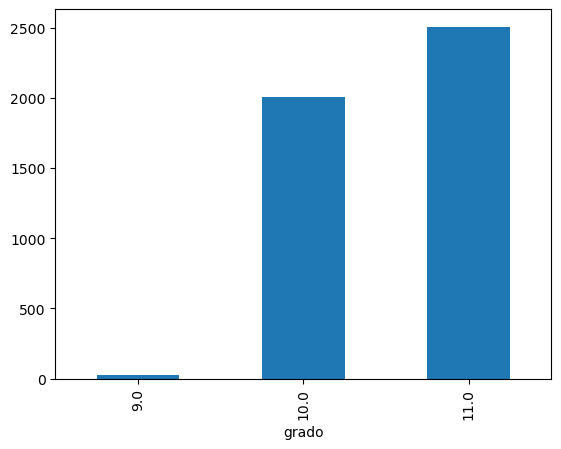

In [44]:
fase1.groupby('grado')['puntajemaximo'].count().plot(kind='bar')
plt.show()

In [45]:
from datetime import timedelta

fase1['Finalizado_dia'] = fase1['Finalizado'].apply(lambda x: x.strftime('%Y-%m-%d'))
fase1['Inicio_dia'] = fase1['Inicio'].apply(lambda x: x.strftime('%Y-%m-%d'))
fase1['Tiempo requerido sep'] = fase1['Tiempo requerido'].round(1)

### Encuesta
En la encuesta se consulta a cada uno de los inscritos por:
- Correo real del inscrito 
- Género: Femenino - Masculino 
- Edad
- Estrato Socio-Económico
- Si tiene o no entrenamiento en Olimpiadas
- Como se entero del evento
- Grado 


In [46]:
encuesta = pd.read_csv(Fase1_data[0])

names_encuesta=encuesta.columns.tolist()
names_encuesta[names_encuesta.index('Nombre completo del usuario')] = 'Nombre_Completo'
names_encuesta[names_encuesta.index('Correo Electrónico - si no tienes, coloca el de tu acudiente')] = 'Correo'
names_encuesta[names_encuesta.index('Género')] = 'Sexo'
names_encuesta[names_encuesta.index('Edad<span class="boundaries"></span>')] = 'Edad'
names_encuesta[names_encuesta.index('Grado que cursas<span class="boundaries"> (4 - 12)</span>')] = 'GradoEncuesta'
names_encuesta[names_encuesta.index('(No es obligatoria esta respuesta) Estrato socio-económico. <span class="boundaries"> (1 - 6)</span>')] = 'Estrato'
names_encuesta[names_encuesta.index('¿Has tenido entrenamiento para las Olimpiadas?')] = 'Entrenamiento'
names_encuesta[names_encuesta.index('¿Cómo se enteró de las Olimpiadas?')] = 'publicidad'


encuesta.columns = names_encuesta

# la direccion de correo tiene el documento del estudiante 
# antes de @ por tanto se extrae y se le agrega al archivo principal


# documento_e = encuesta['Dirección de correo'].str.split('@', expand=True)
# documento_e.columns = ['documento', 'otro']
# encuesta = pd.concat([encuesta, documento_e], axis=1)


# encuesta.drop(['Dirección de correo', 'otro', 'Grupos'], axis=1, inplace=True)

# # Se borran los intentos d prueba que se realizaron

encuesta=encuesta[~encuesta.Nombre_Completo.str.contains("PRUEBA")]


encuesta.head(2)


Nombre_Completo Grupos      Dirección de correo  \
0  NATALIA ABAUNZA GARCA     11  1097185529@gmail.com.es   
1   MANUELA ABAUNZA LPEZ     11    1017929897@gmailcomes   

                                Fecha                      Correo      Sexo  \
0    Sunday, 14 de May de 2023, 16:16  Nataliabaunzagar@gmail.com  Femenino   
1  Saturday, 3 de June de 2023, 21:38      manuabaunzal@gmail.com  Femenino   

   Edad  GradoEncuesta  Estrato publicidad Entrenamiento  
0    16           11.0      NaN    Colegio            No  
1    16           11.0      4.0    Colegio            No

###  Lectura Informe Resumido Moodle
De este archivo se extrae:
- Información del colegio 
- Grado 
- Inscritos totales por colegio y olimpiada 

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

inscripcion = pd.read_csv(Fase1_data[2], low_memory=False)


inscripcion=inscripcion.loc[:, ['Nombre de usuario', 'Grupo de curso', 'Colegio', 'Dirección de correo']]

inscripcion.rename(columns={'Nombre de usuario':'documento',
                        'Grupo de curso':'grado'},
               inplace=True)

print('Número total de inscritos: {}'.format(inscripcion['Dirección de correo'].count()))
inscripcion.groupby('grado').count()

Número total de inscritos: 7172


documento  Colegio  Dirección de correo
grado                                         
6              3        3                    3
7              1        1                    1
8              1        1                    1
9             44       44                   44
10          3174     3174                 3174
11          3949     3949                 3949

In [48]:
inscripcion.dtypes

documento              object
grado                   int64
Colegio                object
Dirección de correo    object
dtype: object

In [49]:
inscripcion.documento=inscripcion.documento.astype(str)

In [50]:
fase1.dtypes

documento                        int64
grado                          float64
Colegio                         object
Dirección de correo             object
Apellido                        object
Nombre                          object
Estado                          object
Inicio                  datetime64[ns]
Finalizado              datetime64[ns]
Tiempo requerido               float64
PuntajeIntento                 float64
cuestionario                     int64
Finalizado_dia                  object
Inicio_dia                      object
Tiempo requerido sep           float64
EXP                            float64
PROP                           float64
TAB                            float64
ESTE                           float64
QORG                           float64
Intento                          int64
maxI                             int64
puntajemaximo                  float64
dtype: object

## Concatenamos datos de distintas fuentes 
- Agregamos codigo ICFES a los intentos de fase 1 
- Agregamos grado a los intentos de fase 1 

In [51]:
inscripcion.dtypes

documento              object
grado                   int64
Colegio                object
Dirección de correo    object
dtype: object

In [52]:
inscripcion.dtypes
inscripcion['Colegio'] = inscripcion['Colegio'].astype(str).str.zfill(6)

In [53]:
fase1.dtypes

documento                        int64
grado                          float64
Colegio                         object
Dirección de correo             object
Apellido                        object
Nombre                          object
Estado                          object
Inicio                  datetime64[ns]
Finalizado              datetime64[ns]
Tiempo requerido               float64
PuntajeIntento                 float64
cuestionario                     int64
Finalizado_dia                  object
Inicio_dia                      object
Tiempo requerido sep           float64
EXP                            float64
PROP                           float64
TAB                            float64
ESTE                           float64
QORG                           float64
Intento                          int64
maxI                             int64
puntajemaximo                  float64
dtype: object

In [54]:
# Agregamos colegio y grado a los estudiantes según su inscripción 


# fase1=inscripcion.merge(fase1, on='Dirección de correo', how="left")

In [55]:
fase1

documento  grado Colegio    Dirección de correo           Apellido  \
0     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
1     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
2     1097499986   10.0   29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
3     1095307646   10.0   29462  1095307646@gmailcomes        QUIONEZ REY   
4     1095307646   10.0   29462  1095307646@gmailcomes        QUIONEZ REY   
...          ...    ...     ...                    ...                ...   
4553  1044214107   11.0    3046  1044214107@gmailcomes    SALOMN MARCHENA   
4554  1047041788   11.0    3046  1047041788@gmailcomes     ALVAREZ ARTETA   
4555  1048069233   11.0    3046  1048069233@gmailcomes  GUTIERREZ CHARRIS   
4556  1032939459   11.0    3046  1032939459@gmailcomes       GMEZ HERRERA   
4557  1043968297   11.0    3046  1043968297@gmailcomes      GRIJALBA MORA   

               Nombre      Estado              Inicio          Finalizado  \
0        SIMON FELIPE  Finalizado 2023-05-02 17:53:00 2023-05-02 18:53:00   
1        SIMON FELIPE  Finalizado 2023-05-02 18:54:00 2023-05-02 19:40:00   
2        SIMON FELIPE  Finalizado 2023-05-02 19:41:00 2023-05-02 20:31:00   
3          JUAN DAVID  Finalizado 2023-05-02 17:56:00 2023-05-02 19:31:00   
4          JUAN DAVID  Finalizado 2023-05-04 17:46:00 2023-05-04 19:46:00   
...               ...         ...                 ...                 ...   
4553          DANIELA    En curso 2023-06-05 08:27:00 2023-06-05 08:41:00   
4554          VALERIE    En curso 2023-06-05 08:28:00 2023-06-05 08:41:00   
4555            LAURA    En curso 2023-06-05 08:32:00 2023-06-05 08:41:00   
4556  SAMUEL JERONIMO    En curso 2023-06-05 08:34:00 2023-06-05 08:41:00   
4557          MARIANA    En curso 2023-06-05 08:36:00 2023-06-05 08:41:00   

      Tiempo requerido  ...  Inicio_dia  Tiempo requerido sep  EXP PROP  TAB  \
0             1.000000  ...  2023-05-02                   1.0  5.0  4.0  3.0   
1             0.766667  ...  2023-05-02                   0.8  4.0  3.0  3.0   
2             0.833333  ...  2023-05-02                   0.8  4.0  2.0  5.0   
3             1.583333  ...  2023-05-02                   1.6  4.0  2.0  3.0   
4             2.000000  ...  2023-05-04                   2.0  2.0  4.0  6.0   
...                ...  ...         ...                   ...  ...  ...  ...   
4553          0.233333  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4554          0.216667  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4555          0.150000  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4556          0.116667  ...  2023-06-05                   0.1  0.0  0.0  0.0   
4557          0.083333  ...  2023-06-05                   0.1  0.0  0.0  0.0   

      ESTE  QORG  Intento  maxI  puntajemaximo  
0      5.0   NaN        1     3           17.0  
1      5.0   NaN        2     3           17.0  
2      3.0   NaN        3     3           17.0  
3      5.0   NaN        1     3           21.0  
4      4.0   NaN        2     3           21.0  
...    ...   ...      ...   ...            ...  
4553   0.0   0.0        1     1            NaN  
4554   0.0   0.0        1     1            NaN  
4555   0.0   0.0        1     1            NaN  
4556   0.0   0.0        1     1            NaN  
4557   0.0   0.0        1     1            NaN  

[4558 rows x 23 columns]

In [56]:
fase1['Colegio']=fase1['Colegio'].replace('udea', 0)
fase1['Colegio']=fase1['Colegio'].replace('000nan', 0)
fase1['Colegio']=fase1['Colegio'].replace('individual', 0)
fase1['Colegio']=fase1['Colegio'].replace('ind', 0)
fase1['Colegio']=fase1['Colegio'].replace('Ind', 0)
fase1['Colegio']=fase1['Colegio'].replace('-1', 0)
fase1['Colegio']=fase1['Colegio'].fillna(0)
fase1['Colegio']=fase1['Colegio'].astype('int64')

In [57]:
fase1[fase1['puntajemaximo']>=0][['documento', 'Nombre', 'Apellido', 'Colegio',  \
                                  'grado', 'Intento', 'EXP', 'PROP', 'TAB','ESTE', 'QORG',\
                                  'PuntajeIntento',  'puntajemaximo', 'maxI']]\
                                 .to_excel('ResultadosColegiosQuimica2023\consolidadoTOTAL_Quimica1.xlsx', index=False)

In [58]:
# fase1[(fase1['puntajemaximo']>=0) &  (fase1['Colegio']==360779)][['documento', 'Nombre', 'Apellido', 'Colegio',  \
#                                  'grado', 'Intento', 'EXP', 'PROP', 'TAB','ESTE', 'QORG',\
#                                  'PuntajeIntento',  'puntajemaximo', 'maxI']]\
#                                 .to_excel('ResultadosColegiosQuimica2021\consolidadoTOTAL_Quimica_Act_360779.xlsx', index=False)

In [59]:
colegios = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=0)]['Colegio'].unique()
len(colegios)

224

In [60]:

colegios_despues_6= fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=0)  &  (fase1['Inicio_dia']>='2023-03-05')]['Colegio'].unique()
print('Colegios presentaron prueba despues del 6 -----', len(colegios_despues_6))


fase1[ (fase1['puntajemaximo']>=0) &  (fase1['Inicio_dia']>='2021-09-05')].pivot_table(index='Inicio_dia', columns=['Intento'], values='documento', aggfunc=['count'], margins= True)


Colegios presentaron prueba despues del 6 ----- 224


count                     
Intento          1       2      3   All
Inicio_dia                             
2023-05-02     7.0     2.0    1.0    10
2023-05-03    45.0     2.0    1.0    48
2023-05-04    48.0     2.0    NaN    50
2023-05-05    80.0     5.0    NaN    85
2023-05-06    41.0    28.0    1.0    70
2023-05-07    70.0    33.0    5.0   108
2023-05-08   133.0    25.0    7.0   165
2023-05-09   200.0    54.0   50.0   304
2023-05-10   194.0    23.0    7.0   224
2023-05-11    61.0     7.0    NaN    68
2023-05-12    37.0    13.0    4.0    54
2023-05-13    24.0     9.0    4.0    37
2023-05-14    21.0    10.0    2.0    33
2023-05-15    90.0    20.0    5.0   115
2023-05-16    78.0    17.0    1.0    96
2023-05-17    85.0    32.0   11.0   128
2023-05-18    93.0    45.0    6.0   144
2023-05-19   171.0    24.0   16.0   211
2023-05-20    28.0    28.0   28.0    84
2023-05-21    32.0    15.0   10.0    57
2023-05-22    52.0    36.0   14.0   102
2023-05-23   127.0    43.0   17.0   187
2023-05-24    67.0    39.0    8.0   114
2023-05-25   139.0    36.0   11.0   186
2023-05-26   275.0    78.0   20.0   373
2023-05-27    69.0    20.0    9.0    98
2023-05-28    71.0    33.0    3.0   107
2023-05-29   158.0    75.0   13.0   246
2023-05-30   123.0    63.0   25.0   211
2023-05-31   144.0   154.0   37.0   335
2023-06-01    40.0    32.0   12.0    84
2023-06-02    64.0    90.0   10.0   164
2023-06-03    47.0    41.0    8.0    96
2023-06-04    61.0    49.0   24.0   134
2023-06-05     2.0     2.0    1.0     5
All         2977.0  1185.0  371.0  4533

In [61]:
colegios_despues_6

array([       29462,          687,            0,       668129,
             128728,       207241,       140467,       168070,
             131854,       667568,         7906,        15909,
                174,        43026,        64162,        31826,
             130096,       117473,        44149,       174433,
       111001104051,        96925, 311769000564,       727487,
             118414,       125682,        19752,        36020,
              19893,       133355,        25130,       193946,
               2865,        11833,         1388,       730499,
             731455,        49643,        56242,        19679,
             108266,       127167,         3194,        51888,
              37390,        14993,        37531, 311001076448,
              20479,       739144,       731331,        57869,
              19331,         9845,       114637,       125187,
             739342,       179358,       599548,       743401,
             719062,        87114,        23101,       

In [62]:
# fase1[(fase1['puntajemaximo']>=0) & (fase1['Colegio']==360779)]\
#     [['documento', 'Nombre', 'Apellido', 'Colegio',  \
#                                  'grado', 'Intento', 'EXP', 'PROP', 'TAB','ESTE', 'QORG',\
#                                  'PuntajeIntento',  'puntajemaximo']].to_excel('ResultadosColegiosQuimica2021/360779.xlsx', index=False)


In [63]:
for i in colegios_despues_6:
     fase1[(fase1['puntajemaximo']>=0) & (fase1['Colegio']==i)]\
     [['documento', 'Nombre', 'Apellido', 'Colegio',  \
                                  'grado', 'Intento', 'EXP', 'PROP', 'TAB','ESTE', 'QORG',\
                                  'PuntajeIntento',  'puntajemaximo']].to_excel('ResultadosColegiosQuimica2023/'+str(i)+'.xlsx', index=False)




In [64]:
IcfesColegio  = pd.read_csv(Fase1_data[3])

In [65]:
IcfesColegio.head(3)

Unnamed: 0 Cargado en moodle                                 institucion  \
0           1                SI  COLEGIO GIMNASIO INTERNACIONAL DE MEDELLIN   
1           2                SI                          COLEGIO MONTESSORI   
2           3                SI  INSTITUCION EDUCATIVA PLACIDO CAMILO CROUS   

           nit   icfes       dpto       ciudad                       dir  \
0  811016934-6  108266  ANTIOQUIA  LA ESTRELLA        Calle 73 sur 64-23   
1  890916768-9   41996  ANTIOQUIA     MEDELLIN  Calle 20 A Sur # 20 - 55   
2  900345302-5  152736   PUTUMAYO   VILLGARZON                     CRA 7   

          tel                         pagina  ...  \
0  3204624639            https://gim.edu.co/  ...   
1     5209150  http://www.montessori.edu.co/  ...   
2  3213979400                            NaN  ...   

                             emailrespon   telrespon  \
0              nataliacardona@gim.edu.co  3117704478   
1  elizabeth519.rincon@montessori.edu.co  3113655090   
2         coordinacioncolcrous@gmail.com  3226409550   

                                             archivo       fecha  \
0  ftp2023/excel/108266_COLEGIO_GIMNASIO_INTERNAC...  09/03/2023   
1  ftp2023/excel/041996_COLEGIO_MONTESSORI_2023-0...  09/03/2023   
2  ftp2023/excel/152736_INSTITUCION_EDUCATIVA_PLA...  15/03/2023   

  noestudiantes factura     rut tarifa Unnamed: 23  Pagos  
0            28    f123  rut123      0         NaN    NaN  
1            71    f123  rut123      0         NaN    NaN  
2            66    f123  rut123      0         NaN    NaN  

[3 rows x 25 columns]

In [66]:


IcfesColegio['icfes']= IcfesColegio['icfes']

In [67]:
IcfesColegio.head(2)

Unnamed: 0 Cargado en moodle                                 institucion  \
0           1                SI  COLEGIO GIMNASIO INTERNACIONAL DE MEDELLIN   
1           2                SI                          COLEGIO MONTESSORI   

           nit   icfes       dpto       ciudad                       dir  \
0  811016934-6  108266  ANTIOQUIA  LA ESTRELLA        Calle 73 sur 64-23   
1  890916768-9   41996  ANTIOQUIA     MEDELLIN  Calle 20 A Sur # 20 - 55   

          tel                         pagina  ...  \
0  3204624639            https://gim.edu.co/  ...   
1     5209150  http://www.montessori.edu.co/  ...   

                             emailrespon   telrespon  \
0              nataliacardona@gim.edu.co  3117704478   
1  elizabeth519.rincon@montessori.edu.co  3113655090   

                                             archivo       fecha  \
0  ftp2023/excel/108266_COLEGIO_GIMNASIO_INTERNAC...  09/03/2023   
1  ftp2023/excel/041996_COLEGIO_MONTESSORI_2023-0...  09/03/2023   

  noestudiantes factura     rut tarifa Unnamed: 23  Pagos  
0            28    f123  rut123      0         NaN    NaN  
1            71    f123  rut123      0         NaN    NaN  

[2 rows x 25 columns]

In [68]:
IcfesColegio[IcfesColegio.icfes==108266]

Unnamed: 0 Cargado en moodle                                 institucion  \
0           1                SI  COLEGIO GIMNASIO INTERNACIONAL DE MEDELLIN   

           nit   icfes       dpto       ciudad                 dir  \
0  811016934-6  108266  ANTIOQUIA  LA ESTRELLA  Calle 73 sur 64-23   

          tel               pagina  ...                emailrespon  \
0  3204624639  https://gim.edu.co/  ...  nataliacardona@gim.edu.co   

    telrespon                                            archivo       fecha  \
0  3117704478  ftp2023/excel/108266_COLEGIO_GIMNASIO_INTERNAC...  09/03/2023   

  noestudiantes factura     rut tarifa Unnamed: 23  Pagos  
0            28    f123  rut123      0         NaN    NaN  

[1 rows x 25 columns]

In [69]:
fase1

documento  grado  Colegio    Dirección de correo           Apellido  \
0     1097499986   10.0    29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
1     1097499986   10.0    29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
2     1097499986   10.0    29462  1097499986@gmailcomes     SAAVEDRA ARIAS   
3     1095307646   10.0    29462  1095307646@gmailcomes        QUIONEZ REY   
4     1095307646   10.0    29462  1095307646@gmailcomes        QUIONEZ REY   
...          ...    ...      ...                    ...                ...   
4553  1044214107   11.0     3046  1044214107@gmailcomes    SALOMN MARCHENA   
4554  1047041788   11.0     3046  1047041788@gmailcomes     ALVAREZ ARTETA   
4555  1048069233   11.0     3046  1048069233@gmailcomes  GUTIERREZ CHARRIS   
4556  1032939459   11.0     3046  1032939459@gmailcomes       GMEZ HERRERA   
4557  1043968297   11.0     3046  1043968297@gmailcomes      GRIJALBA MORA   

               Nombre      Estado              Inicio          Finalizado  \
0        SIMON FELIPE  Finalizado 2023-05-02 17:53:00 2023-05-02 18:53:00   
1        SIMON FELIPE  Finalizado 2023-05-02 18:54:00 2023-05-02 19:40:00   
2        SIMON FELIPE  Finalizado 2023-05-02 19:41:00 2023-05-02 20:31:00   
3          JUAN DAVID  Finalizado 2023-05-02 17:56:00 2023-05-02 19:31:00   
4          JUAN DAVID  Finalizado 2023-05-04 17:46:00 2023-05-04 19:46:00   
...               ...         ...                 ...                 ...   
4553          DANIELA    En curso 2023-06-05 08:27:00 2023-06-05 08:41:00   
4554          VALERIE    En curso 2023-06-05 08:28:00 2023-06-05 08:41:00   
4555            LAURA    En curso 2023-06-05 08:32:00 2023-06-05 08:41:00   
4556  SAMUEL JERONIMO    En curso 2023-06-05 08:34:00 2023-06-05 08:41:00   
4557          MARIANA    En curso 2023-06-05 08:36:00 2023-06-05 08:41:00   

      Tiempo requerido  ...  Inicio_dia  Tiempo requerido sep  EXP PROP  TAB  \
0             1.000000  ...  2023-05-02                   1.0  5.0  4.0  3.0   
1             0.766667  ...  2023-05-02                   0.8  4.0  3.0  3.0   
2             0.833333  ...  2023-05-02                   0.8  4.0  2.0  5.0   
3             1.583333  ...  2023-05-02                   1.6  4.0  2.0  3.0   
4             2.000000  ...  2023-05-04                   2.0  2.0  4.0  6.0   
...                ...  ...         ...                   ...  ...  ...  ...   
4553          0.233333  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4554          0.216667  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4555          0.150000  ...  2023-06-05                   0.2  0.0  0.0  0.0   
4556          0.116667  ...  2023-06-05                   0.1  0.0  0.0  0.0   
4557          0.083333  ...  2023-06-05                   0.1  0.0  0.0  0.0   

      ESTE  QORG  Intento  maxI  puntajemaximo  
0      5.0   NaN        1     3           17.0  
1      5.0   NaN        2     3           17.0  
2      3.0   NaN        3     3           17.0  
3      5.0   NaN        1     3           21.0  
4      4.0   NaN        2     3           21.0  
...    ...   ...      ...   ...            ...  
4553   0.0   0.0        1     1            NaN  
4554   0.0   0.0        1     1            NaN  
4555   0.0   0.0        1     1            NaN  
4556   0.0   0.0        1     1            NaN  
4557   0.0   0.0        1     1            NaN  

[4558 rows x 23 columns]

In [70]:
print('Estudiantes que pasan a la segunda fase {}, {} '\
      .format(fase1[(fase1['puntajemaximo']>=14) & (fase1['Intento']==1)]['documento'].count(), \
             fase1[(fase1['puntajemaximo']>=14) & (fase1['Intento']==1)]['documento'].count()/fase1[fase1['Intento']==1]['documento'].count()*100))
fase1[(fase1['puntajemaximo']>=14) & (fase1['Intento']==1)].groupby('grado')['puntajemaximo'].describe()

Estudiantes que pasan a la segunda fase 1473, 49.067288474350434 


count       mean       std   min    25%   50%    75%   max
grado                                                            
9.0     10.0  17.200000  2.780887  14.0  15.25  16.5  17.75  22.0
10.0   622.0  16.580386  2.218166  14.0  15.00  16.0  18.00  24.0
11.0   841.0  16.651605  2.117647  14.0  15.00  16.0  18.00  24.0

## Número de colegios que presentaron FASE 1

In [71]:
colegios= fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=0)]['Colegio'].unique()
len(colegios)

224

In [72]:
total1 = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']<=13)]['puntajemaximo'].count()


total2 = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=0)]['puntajemaximo'].count()

total = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=14)]['puntajemaximo'].count()
 
basico = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=14) & (fase1['puntajemaximo']<=17)]['puntajemaximo'].count()
alto = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=18) & (fase1['puntajemaximo']<=21)]['puntajemaximo'].count()
superior = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>21) ]['puntajemaximo'].count()

print('Total estudiantes que realizaron la prueba    {}'.format(total2))
print('Total estudiantes que clasificaron            {}'.format(total))

print('Puntaje entre  0 y  13 --  Desempeño Bajo       {} estudiantes {:.2%}'\
          .format(total1, total1/total2))

print('Puntaje entre  14 y 17 --  Desempeño Básico     {} estudiantes {:.2%}'\
          .format(basico, basico/total2))
print('Puntaje entre 18 y 21 --  Desempeño Alto       {} estudiantes {:.2%}'\
      .format(alto, alto/total2))
print('Puntaje mayor a    21 --  Desempeño Superior    {} estudiantes  {:.2%}'\
      .format(superior, superior/total2))


Total estudiantes que realizaron la prueba    2977
Total estudiantes que clasificaron            1473
Puntaje entre  0 y  13 --  Desempeño Bajo       1504 estudiantes 50.52%
Puntaje entre  14 y 17 --  Desempeño Básico     1009 estudiantes 33.89%
Puntaje entre 18 y 21 --  Desempeño Alto       425 estudiantes 14.28%
Puntaje mayor a    21 --  Desempeño Superior    39 estudiantes  1.31%


In [73]:
len(fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=14)].Colegio.unique()) 

190

In [74]:
fase1['Finalizado']

0      2023-05-02 18:53:00
1      2023-05-02 19:40:00
2      2023-05-02 20:31:00
3      2023-05-02 19:31:00
4      2023-05-04 19:46:00
               ...        
4553   2023-06-05 08:41:00
4554   2023-06-05 08:41:00
4555   2023-06-05 08:41:00
4556   2023-06-05 08:41:00
4557   2023-06-05 08:41:00
Name: Finalizado, Length: 4558, dtype: datetime64[ns]

## Envia correo con la Información y archivo adjunto 

In [ ]:
#Colegios_tex = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=14)].Colegio.unique()    

# for des_colegio in Colegios_tex:    
#     total1 = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']<=13) & \
#                        (fase1['Colegio']==des_colegio)]['puntajemaximo'].count()

#     total2 = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=0) & \
#                        (fase1['Colegio']==des_colegio)]['puntajemaximo'].count()

#     fase2_c = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=14) & \
#                        (fase1['Colegio']==des_colegio)]['puntajemaximo'].count()



#     total = fase1[fase1['Colegio']==des_colegio]['documento'].nunique() 

#     total_insc = fase1[(fase1['Colegio']==des_colegio)]['documento'].nunique()

#     basico = fase1[(fase1['Intento']==1) & (fase1['puntajemaximo']>=14)\
#                        & (fase1['puntajemaximo']<=25) & (fase1['Colegio']==des_colegio)]['puntajemaximo'].count()


# #    import sys 

# #    stdoutOrigin=sys.stdout 
# #    sys.stdout = open('textoQuimica/'+str(des_colegio)+'.txt', "w")

#     print('<h3>{}</h3>'\
#               .format(IcfesColegio[IcfesColegio['icfes']==des_colegio]['nombre_colegio'].to_string(index=False)))

#     print('<p style="margin:10px 0px;text-align:justify">Cordial saludo,  damos la bienvenida a la Fase 2 de la Olimpiada de Química, informando que los alumnos clasificados a la misma, podrán ingresar desde el 1 al 10 de octubre de 2021 a la plataforma Moodle.<\p>') 
#     print('<p style="margin:10px 0px;text-align:justify">Para acceder, deben ingresar como lo hicieron para la  fase anterior, al link: https://virtual.matematicasudea.co/login/ escribir su número de documento (sin puntos), en ambos campos (Nombre de usuario y Contraseña.)<\p>') 

#     print('<p style="margin:10px 0px;text-align:justify">La Fase 2 planteará  interesantes retos,  estarán a un paso de la gran final.<\p>')
#     print('\n')
#     print('<p style="margin:10px 0px;text-align:justify">A continuación se presentan los resultados consolidados de participación en la Fase 1:<\p>')
    
   



#     print('Estudiantes inscritos:                   {}'\
#               .format(total_insc))
#     print('Estudiantes que realizaron la prueba:    {}   -  {:.2%}'\
#               .format(total2, total2/total_insc))



#     print('Estudiantes clasificados a segunda fase:             {}   -  {:.2%}' \
#               .format(fase2_c, fase2_c/total2))

#     print('\n')
#     print('<table  style="text-align:center"><tr><th style="border: 1px solid gray">  PUNTAJE  </th><th style="border: 1px solid gray">  ESTUDIANTES  </th><th style="border: 1px solid gray">  PORCENTAJE  </th><th style="border: 1px solid gray"> FASE 2 </th></tr>')
#     print('<tr><td style="border: 1px solid gray" >0 -  13</td><td style="border: 1px solid gray"> {} </td><td style="border: 1px solid gray">{:.2%}</td><td style="border: 1px solid gray" > NO </td></tr>'.format(total1, total1/total2))
#     print('<tr><td style="border: 1px solid gray" >14 -  25</td><td style="border: 1px solid gray"> {} </td><td style="border: 1px solid gray">{:.2%}</td><td style="border: 1px solid gray"> SI </td></tr></table>'.format(basico, basico/total2))

    
    
#     print('Link para consulta de resultaddos:')
#     print('Estudiantes: http://olimpiadasudea.co/olimpquimica/resultados_individual.html ')
#     print('Colegios o IE: http://olimpiadasudea.co/olimpquimica/resultados_colegio.html \n \n')

#     print('<b><font color="#38761d">Olimpiada de Química 2021</font>')
#     print('<b><font color="#000000">Instituto de Química</font>')
#     print('<b><font color="#000000">Facultad de Ciencias Exactas y Naturales</font>')
#     print('<b><font color="#000000">Universidad de Antioquia</font>')
    
#     print('<p style="margin:10px 0px;text-align:justify"><h5>Nota importante: Por favor no responder este correo electrónico. Agradecemos dirigir sus inquietudes respecto a la información presentada a: olimpquimica@udea.edu.co .<h5><\p>')
    

In [ ]:
# sys.stdout.close()
# sys.stdout=stdoutOrigin

In [ ]:
# Colegios_tex 

In [ ]:
# Colegios_tex = np.array([     2840,
#              108589,       160788,       599910,        85654,
#              665711,       169425, 311001044317,         1388,
#               75366,        85712,       173294,       114074,
#                1891,        20511,       193847,        55657,
#              180265,         2683,       743534,         2451,
#                3855,       117573,       620476,       133751,
#               17106,        14316,        90613  ])

In [ ]:

# for des_colegio in Colegios_tex: 
#     contenido =(open('C:\\Mathdecision\\olimpiadas\\textoQuimica\\'+str(des_colegio)+'.txt'))
#     html = '<h1></h1><p>{}</p>'.format(contenido.read())

#         #-*- coding:utf-8 -*-

#         # conectar app no seguras en gmail 


#     import yagmail



#         #Conectando a un servidor de buzón
#     yag = yagmail.SMTP(
#                  "olimpiadasudea@gmail.com", # cuenta de correo electrónico
#                  "2aHibnVNCZdhaxG", # El buzón abre el código de autorización del servicio smtp
#                  "smtp.gmail.com" # Dirección del servidor
#                  #smtp_ssl = Verdadero #Si usa un buzón qq o el buzón de su empresa usa un protocolo de seguridad, debe escribir smtp_ssl = Verdadero
#         )

#          #Enviar correo
#     yag.send(
#                  [IcfesColegio[IcfesColegio.icfes==des_colegio]['correo_profesor'].to_string(index=False)], # Si hay varios destinatarios, simplemente escriba una lista
#                 ['Olimpiada de Química 2021 - '+str(des_colegio)+'-'], #me
#                  [ html] , #Email
#             ['C:\\Mathdecision\\olimpiadas\\ResultadosColegiosQuimica2021\\'+str(des_colegio)+'.xlsx', 'C:\\Mathdecision\\olimpiadas\\textoQuimica\\pasaste.jpeg']
#         )

#     contenido.close()

In [ ]:

fase1[fase1['documento']=='1053442895' ]\
     [['documento', 'Nombre', 'Apellido', 'Colegio',  \
       'grado', 'Intento', 'PuntajeIntento', 'puntajemaximo', 'EXP', 'PROP', 'TAB','ESTE', 'QORG' ]]
